# LendSmart Analysis
In this notebook an analysis about the company LendSmart will be conducted, the analysis will provide a statistical model that
predicts the likelihood of a new applicant defaulting on their loan. The current loan portfolio has a 28% default rate, which this analysis aims to reduce. To do this, two classification techniques will be used, Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA). 

## Section 1: Project Setup & Data Loading

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt
from pathlib import Path

# Load the dataset
base_dir = Path.cwd()
csv_file = base_dir.parent / "data" / "credit_risk_data-1.csv"

data = pd.read_csv(csv_file)






In [6]:
# Control checkpoint and initial glimpse of the dataset and variables 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         2500 non-null   object 
 1   application_date       2500 non-null   object 
 2   loan_amount            2500 non-null   float64
 3   annual_income          2500 non-null   float64
 4   employment_years       2500 non-null   float64
 5   job_stability_score    2500 non-null   float64
 6   credit_score           2500 non-null   int64  
 7   credit_utilization     2500 non-null   float64
 8   payment_history_score  2500 non-null   float64
 9   open_credit_lines      2500 non-null   int64  
 10  debt_to_income_ratio   2500 non-null   float64
 11  savings_ratio          2500 non-null   float64
 12  asset_value            2500 non-null   float64
 13  age                    2500 non-null   int64  
 14  education_level        2500 non-null   object 
 15  mari

In [19]:
data.head()

,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,marital_status,residential_stability,loan_status
0,APP_2328,2022-01-01,132221.82,60451.82,6.6,0.898,679,0.106,0.876,1,0.451,0.500,352569.55,41,High School,Married,3.5,0
1,APP_558,2022-01-01,134906.42,114634.08,10.3,0.808,718,0.030,0.719,4,0.090,0.235,224364.21,46,Masters,Divorced,11.4,0
2,APP_2477,2022-01-01,30285.19,82772.53,12.1,0.964,768,0.174,0.775,6,0.201,0.172,514765.55,44,High School,Widowed,8.6,0
3,APP_741,2022-01-01,32516.09,94023.36,9.1,0.690,670,0.141,0.993,3,0.322,0.368,182541.72,26,Bachelors,Single,3.9,0
4,APP_145,2022-01-02,77900.99,53515.02,7.2,0.679,651,0.097,0.946,2,0.222,0.324,223691.29,50,Associates,Single,9.6,0


In [20]:
print(data.describe())

         loan_amount  annual_income  employment_years  job_stability_score  \
count    2500.000000    2500.000000       2500.000000          2500.000000   
mean   155716.305344   67707.807596          6.675640             0.634643   
std    149605.357952   27302.931731          3.488021             0.293276   
min      5000.000000   15000.000000          0.000000             0.011000   
25%     42984.517500   47475.317500          4.000000             0.375500   
50%     97054.315000   66963.475000          6.700000             0.752000   
75%    213214.992500   87347.642500          9.300000             0.866000   
max    500000.000000  149929.960000         19.300000             0.999000   

       credit_score  credit_utilization  payment_history_score  \
count   2500.000000         2500.000000            2500.000000   
mean     681.728400            0.358176               0.740733   
std       88.683309            0.289995               0.285966   
min      334.000000            0.

### Initial findings 
Using the .info() function we can conclude that there is no missing values across the variables. Furthermore, there is 18 columns and 2500 observations. 
The .head() function just gives us the five first rows of the dataframe where we can check that nothing is missing or looks wrong, which in this analysis is not the case. 
Lastly, the .describe() displays information about each of the 18 variables, here we can make observations about statistics of the variables, and also see if the data contains outliers or anomalies. 

## Section 2: Exploratory Data Analysis (EDA)

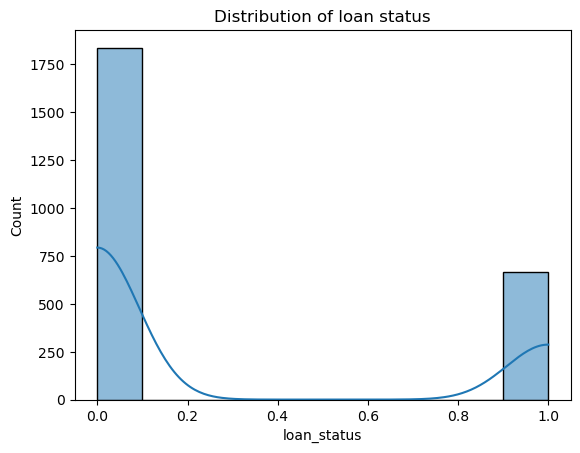

Default rate: 26.560%


In [21]:
# Ploting distribution of target variable loan_status
sns.histplot(data["loan_status"], bins=10, kde=True)
plt.title(f"Distribution of loan status")
plt.show()

# Calculate default rate
default_rate = (data['loan_status'] == 1).mean() * 100

print(f"Default rate: {default_rate:.3f}%")



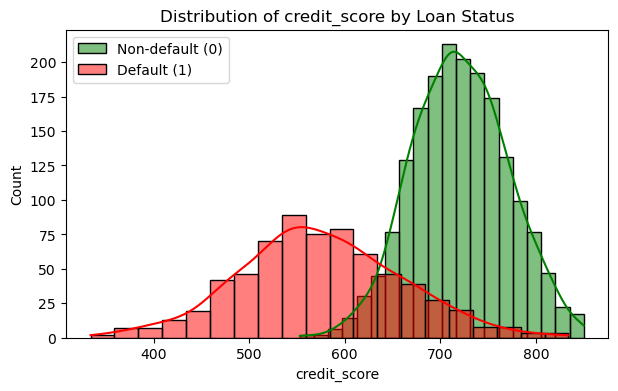

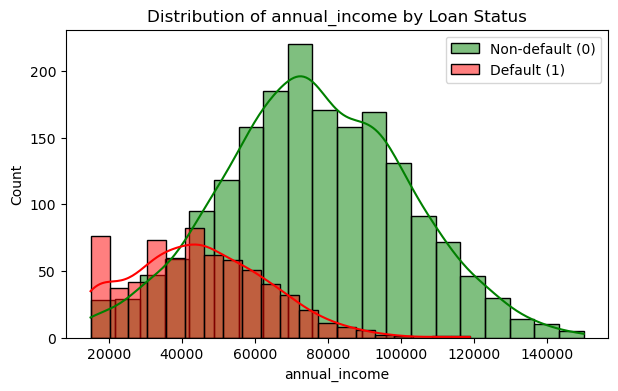

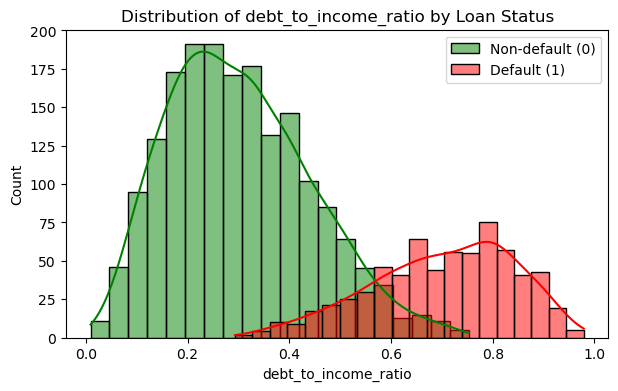

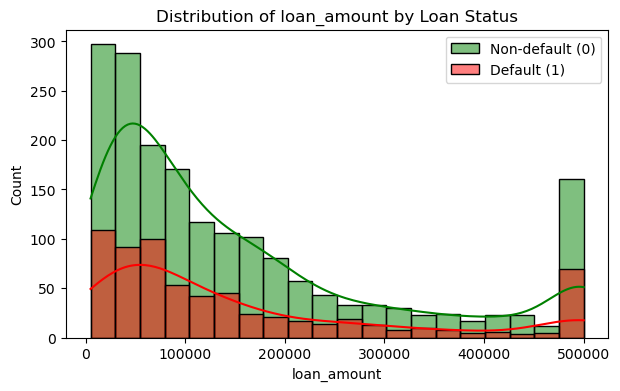

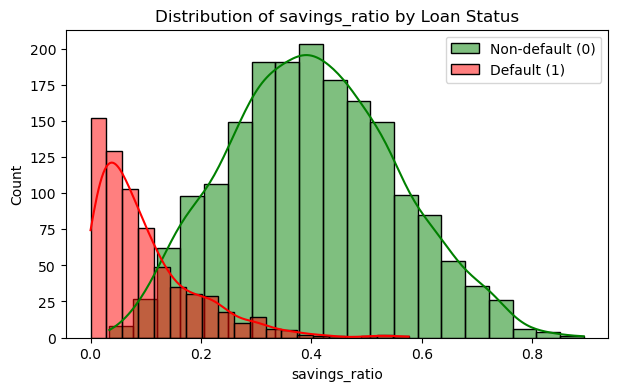

In [22]:
# Visualizations of the continous variables
continuous_vars = ["credit_score", "annual_income", "debt_to_income_ratio", "loan_amount", "savings_ratio"]

for var in continuous_vars:
    plt.figure(figsize=(7,4))
    sns.histplot(data=data[data["loan_status"]==0], x=var, color="green", kde=True, bins=20, label="Non-default (0)", alpha=0.5)
    sns.histplot(data=data[data["loan_status"]==1], x=var, color="red", kde=True, bins=20, label="Default (1)", alpha=0.5)
    plt.title(f"Distribution of {var} by Loan Status")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.legend()
    plt.show()

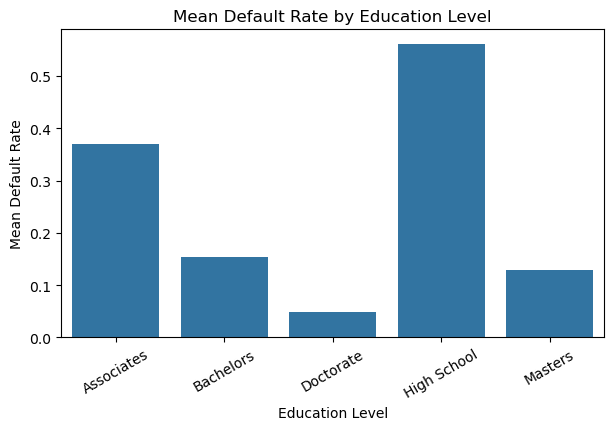

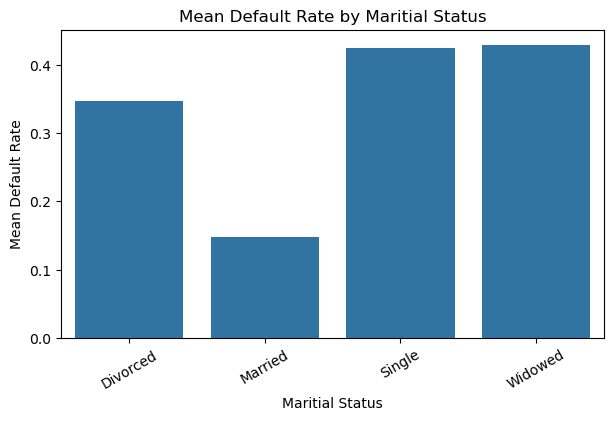

In [23]:
# Visualizations of the categorical variables


edu_default_rate = data.groupby("education_level")["loan_status"].mean().reset_index()
plt.figure(figsize=(7,4))
sns.barplot(data=edu_default_rate, x="education_level", y="loan_status")
plt.title("Mean Default Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Mean Default Rate")
plt.xticks(rotation=30)
plt.show()

marriage_default_rate = data.groupby("marital_status")["loan_status"].mean().reset_index()
plt.figure(figsize=(7,4))
sns.barplot(data=marriage_default_rate, x="marital_status", y="loan_status")
plt.title("Mean Default Rate by Maritial Status")
plt.xlabel("Maritial Status")
plt.ylabel("Mean Default Rate")
plt.xticks(rotation=30)
plt.show()

                       loan_amount  annual_income  employment_years  \
loan_amount               1.000000       0.012781         -0.013475   
annual_income             0.012781       1.000000          0.329543   
employment_years         -0.013475       0.329543          1.000000   
job_stability_score      -0.016704       0.459296          0.572680   
credit_score             -0.034981       0.367561          0.460022   
credit_utilization        0.012619      -0.467363         -0.563996   
payment_history_score    -0.007920       0.464480          0.585060   
open_credit_lines        -0.011295       0.212823          0.283112   
debt_to_income_ratio      0.002300      -0.393771         -0.501355   
savings_ratio             0.011152       0.361995          0.425000   
asset_value               0.003012       0.221337          0.265056   
age                      -0.011678       0.180273          0.225355   
residential_stability    -0.003439       0.267108          0.320260   
loan_s

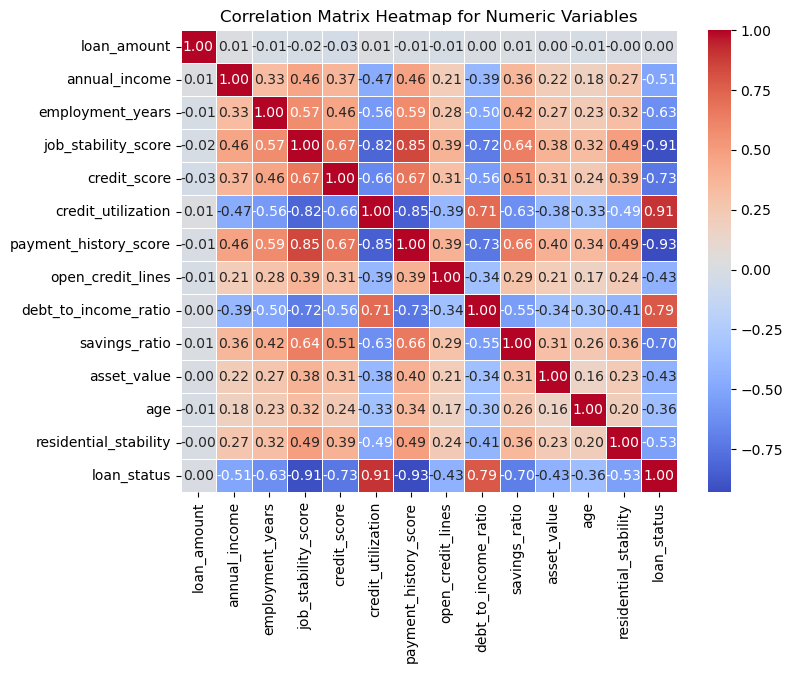

In [24]:
# Heatmap of all numerical variables correlations
numeric_data = data.select_dtypes(include=["float64", "int64"])
corr_matrix = numeric_data.corr()
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap for Numeric Variables")
plt.show()

The correlation heatmap shows the highest correlations for loan_status-credit_utilization with a score of 0.91, job_stability_score-payment_history_score with 0.85, debt_to_income_ratio-loan_status with 0.79 and also debt_to_income_ratio-credit_utilization with 0.71. All of these are relatively high correlations and therefore shows dependency between these variables. 

## Section 3: Data Preprocessing

In [25]:
# Converting educational_level and maritial_status into dummy variables
data_dummies = pd.get_dummies(data, columns=["education_level", "marital_status"])
print(data_dummies)

     application_id application_date  loan_amount  annual_income  \
0          APP_2328       2022-01-01    132221.82       60451.82   
1           APP_558       2022-01-01    134906.42      114634.08   
2          APP_2477       2022-01-01     30285.19       82772.53   
3           APP_741       2022-01-01     32516.09       94023.36   
4           APP_145       2022-01-02     77900.99       53515.02   
...             ...              ...          ...            ...   
2495        APP_430       2024-12-28    500000.00      149929.96   
2496       APP_2040       2024-12-29     38284.25       63593.34   
2497       APP_1693       2024-12-29    166329.17       75670.19   
2498        APP_460       2024-12-29     43779.56       34662.35   
2499       APP_2150       2024-12-29     26298.74       73778.90   

      employment_years  job_stability_score  credit_score  credit_utilization  \
0                  6.6                0.898           679               0.106   
1                 10.

In [26]:
# Define predictors 
X = data_dummies.drop(columns=["loan_status", "application_id", "application_date"]) 

# Define target
y = data_dummies["loan_status"]

# Split training data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Init standard scaler
scaler = StandardScaler()

# Fit only on training data
scaler.fit(X_train)

# Transform both train and test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Section 4: Statistical Assumption Testing

- LDA vs. QDA:
LDA assumes all classess share the same covariance matrix while QDA instead assumes they do nnot share covariance matrixes. This results in LDA creating *linear* decision boundries and QDA creating *quadratic* linear boundaries. Both methods also assume the data follows a normal distribution.

- Multivariate Normality:
The multivariate normality assumption requires that, within each class (“default” and “not default”), the variables are approximately normally distributed.
    - Do your EDA plots suggest this is reasonably met?
      From the distribution plots, most variables appear roughly symmetric among some variables, like credit score. On the other hand, variables like loan_amount and savings_ratio show strong skewness and heavy tails, indicating clear deviations from normality. Therefore, the assumption of multivariate normality is not well met oin this cases, which could affect how accurately LDA/QDA classify the data.
      
- Homogeneity of Covariance Matrices:
LDA assumes all classes share one covariance matrix, implying equal variable relationships and spread across groups, leading to linear boundaries.
QDA allows each class its own covariance matrix, producing quadratic boundaries.

- Hypothesis:
The correlation matrix shows some strong and some weaker relationships about the predictors. Although only one covariance matrix was computed for all observations, it is reasonable to expect that defaulters and non-defaulters differ in how financial variables such as credit utilization, payment history, and debt-to-income ratio relate to one another.
Therefore we hypothesize that the covariance structures between the two groups are likely unequal, and that QDA may outperform LDA as a result.

## Section 5: Model 1 - Linear Discriminant Analysis (LDA)

In [27]:
# Init lda and train 
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# Interpret Coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lda.coef_[0]
})
coef_df['AbsValue'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('AbsValue', ascending=False)
print(coef_df)



                        Feature  Coefficient   AbsValue
6         payment_history_score   -15.470813  15.470813
3           job_stability_score   -13.050045  13.050045
5            credit_utilization    11.767166  11.767166
8          debt_to_income_ratio     4.471488   4.471488
4                  credit_score    -3.982636   3.982636
9                 savings_ratio    -2.994385   2.994385
2              employment_years    -2.368588   2.368588
12        residential_stability    -1.699571   1.699571
1                 annual_income    -1.585538   1.585538
7             open_credit_lines    -1.276691   1.276691
10                  asset_value    -1.223850   1.223850
16  education_level_High School     1.025507   1.025507
20        marital_status_Single     0.467681   0.467681
19       marital_status_Married    -0.450546   0.450546
0                   loan_amount    -0.408768   0.408768
11                          age    -0.357359   0.357359
14    education_level_Bachelors    -0.321483   0

From this we can interpret that payment_history_score has a very strong negative effect, which means that people with higher payment history scores are much less likely to default. The variable job_stability_score also is strongly negative, stable employment greatly reduces default risk.
Furthermore credit_utilization has +11.77 which is the strongest positive score, showing that using a lot of available credit increases default risk.
Thereafter comes debt_to_income_ratio, credit_score and savings_ratio which are among the most important drivers of default risk.


## Section 6: Model 2 - Quadratic Discriminant Analysis (QDA)

In [28]:
# Init the QDA and train
#qda = QuadraticDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)
qda.fit(X_train_scaled, y_train)




QuadraticDiscriminantAnalysis(reg_param=0.1)

## Section 7: Model Evaluation & Comparison

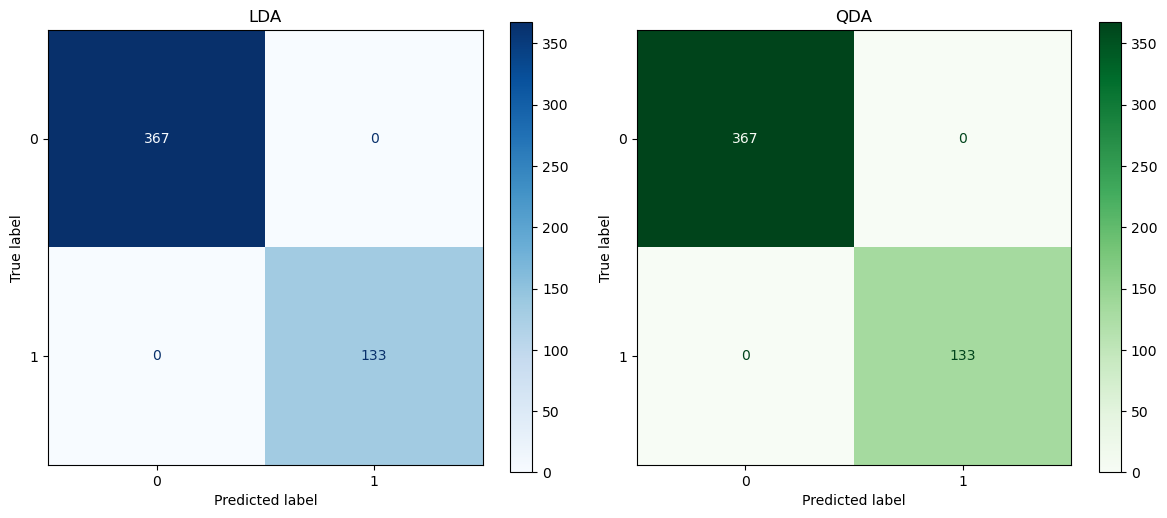

In [51]:
# Predict on the test set for both LDA and QDA
pred_lda = lda.predict(X_test_scaled)
pred_qda = qda.predict(X_test_scaled)

# Confusion matrixes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(lda, X_test_scaled, y_test, ax=axes[0], cmap="Blues")
axes[0].set_title("LDA")

ConfusionMatrixDisplay.from_estimator(qda, X_test_scaled, y_test, ax=axes[1], cmap="Greens")
axes[1].set_title("QDA")

plt.tight_layout()
plt.show()

In [52]:
# Display classification reports
print("--- LDA Classification Report ---")
print(classification_report(y_test, pred_lda))

print("--- QDA Classification Report ---")
print(classification_report(y_test, pred_qda))

--- LDA Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       133

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

--- QDA Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       133

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



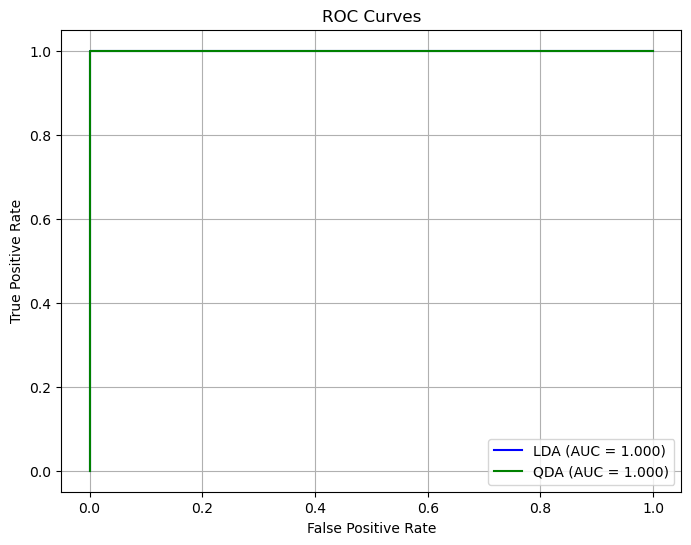

LDA AUC: 1.000
QDA AUC: 1.000


In [53]:
# Get predicted probabilities for ROC curves
lda_probs = lda.predict_proba(X_test_scaled)[:, 1]
qda_probs = qda.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curves
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_probs)
fpr_qda, tpr_qda, _ = roc_curve(y_test, qda_probs)

# Compute AUC scores
auc_lda = roc_auc_score(y_test, lda_probs)
auc_qda = roc_auc_score(y_test, qda_probs)

# Plot ROC curves together
plt.figure(figsize=(8,6))
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC = {auc_lda:.3f})", color='blue')
plt.plot(fpr_qda, tpr_qda, label=f"QDA (AUC = {auc_qda:.3f})", color='green')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

# Print AUC values
print(f"LDA AUC: {auc_lda:.3f}")
print(f"QDA AUC: {auc_qda:.3f}")

## Section 8: Technical Conclusion & Model Selection

Both models achieved perfect classification on the test data, correctly identifying all defaulters and non-defaulters. This results in an accuracy, precision, recall, and F1-score of 1 for all metrics.
The identical performance of LDA and QDA shows both models show the same decision boundary effectively.
However, such perfect results may also indicate potential leakage or or an overly simplistic dataset and should be interpreted with caution.

In [54]:
data_dummies.select_dtypes(include=[np.number]).corr()['loan_status'].sort_values(ascending=False)

loan_status              1.000000
credit_utilization       0.906134
debt_to_income_ratio     0.785210
loan_amount              0.003192
age                     -0.355555
open_credit_lines       -0.429446
asset_value             -0.430579
annual_income           -0.508140
residential_stability   -0.531898
employment_years        -0.628269
savings_ratio           -0.697444
credit_score            -0.728160
job_stability_score     -0.912006
payment_history_score   -0.931093
Name: loan_status, dtype: float64

This shows that some features have very strong correlation with the target. That means they contain the same information as the target and make the model trivially accurate. For experiment reasons we try to remove the varibles with the strongest correlations.

In [55]:
leaks = [
    "payment_history_score",
    "job_stability_score",
    "credit_utilization",
    "debt_to_income_ratio",
    "credit_score",
    "savings_ratio"
]

X = data_dummies.drop(columns=["loan_status", "application_id", "application_date"] + leaks)
y = data_dummies["loan_status"]

In [56]:
# Split training data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Init standard scaler
scaler = StandardScaler()

# Fit only on training data
scaler.fit(X_train)

# Transform both train and test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Init lda and train 
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# Interpret Coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lda.coef_[0]
})
coef_df['AbsValue'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('AbsValue', ascending=False)
print(coef_df)

                        Feature  Coefficient  AbsValue
2              employment_years    -2.417321  2.417321
6         residential_stability    -1.728220  1.728220
1                 annual_income    -1.487763  1.487763
4                   asset_value    -1.213066  1.213066
3             open_credit_lines    -1.075697  1.075697
5                           age    -0.825460  0.825460
10  education_level_High School     0.723804  0.723804
13       marital_status_Married    -0.432273  0.432273
8     education_level_Bachelors    -0.339798  0.339798
14        marital_status_Single     0.339404  0.339404
11      education_level_Masters    -0.276838  0.276838
9     education_level_Doctorate    -0.266249  0.266249
7    education_level_Associates     0.184448  0.184448
15       marital_status_Widowed     0.172094  0.172094
12      marital_status_Divorced     0.047259  0.047259
0                   loan_amount     0.021124  0.021124


In [58]:
# Init the QDA and train
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


QuadraticDiscriminantAnalysis()

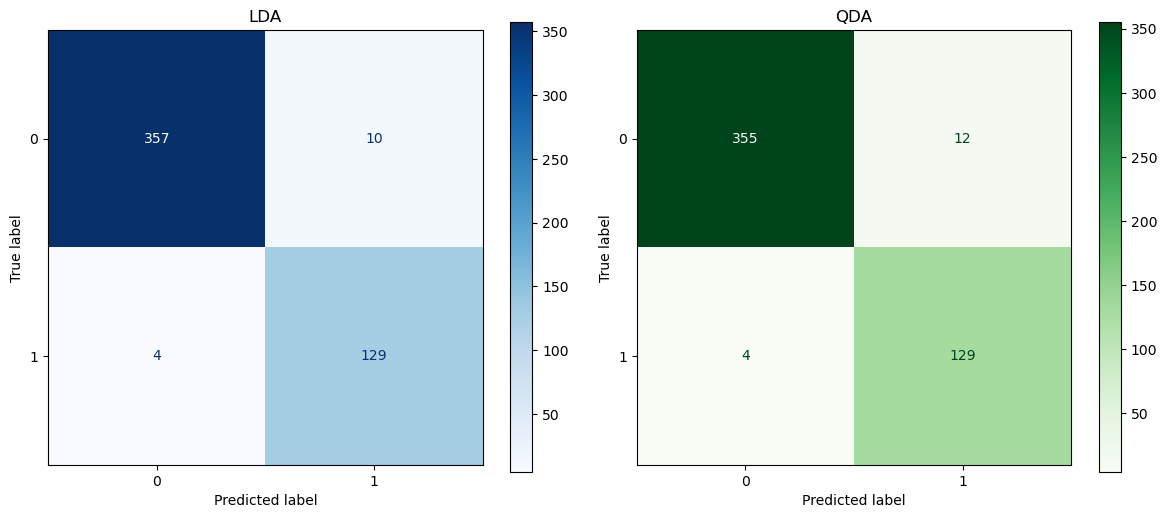

In [59]:
# Predict on the test set for both LDA and QDA
pred_lda = lda.predict(X_test_scaled)
pred_qda = qda.predict(X_test_scaled)

# Confusion matrixes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(lda, X_test_scaled, y_test, ax=axes[0], cmap="Blues")
axes[0].set_title("LDA")

ConfusionMatrixDisplay.from_estimator(qda, X_test_scaled, y_test, ax=axes[1], cmap="Greens")
axes[1].set_title("QDA")

plt.tight_layout()
plt.show()

In [60]:
# Display classification reports
print("--- LDA Classification Report ---")
print(classification_report(y_test, pred_lda))

print("--- QDA Classification Report ---")
print(classification_report(y_test, pred_qda))

--- LDA Classification Report ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       367
           1       0.93      0.97      0.95       133

    accuracy                           0.97       500
   macro avg       0.96      0.97      0.96       500
weighted avg       0.97      0.97      0.97       500

--- QDA Classification Report ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       367
           1       0.91      0.97      0.94       133

    accuracy                           0.97       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.97      0.97      0.97       500



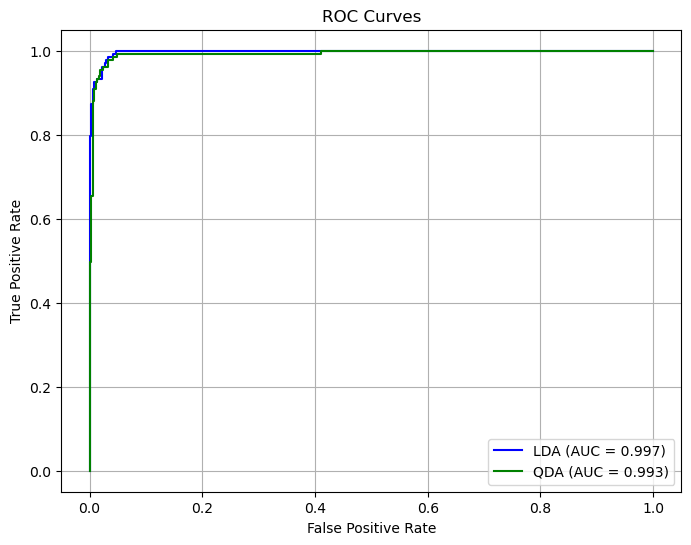

LDA AUC: 0.997
QDA AUC: 0.993


In [61]:
# Get predicted probabilities for ROC curves
lda_probs = lda.predict_proba(X_test_scaled)[:, 1]
qda_probs = qda.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curves
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_probs)
fpr_qda, tpr_qda, _ = roc_curve(y_test, qda_probs)

# Compute AUC scores
auc_lda = roc_auc_score(y_test, lda_probs)
auc_qda = roc_auc_score(y_test, qda_probs)

# Plot ROC curves together
plt.figure(figsize=(8,6))
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC = {auc_lda:.3f})", color='blue')
plt.plot(fpr_qda, tpr_qda, label=f"QDA (AUC = {auc_qda:.3f})", color='green')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

# Print AUC values
print(f"LDA AUC: {auc_lda:.3f}")
print(f"QDA AUC: {auc_qda:.3f}")

After cleaning the data and removing variables that leaked target information, both LDA and QDA still performed very well, with accuracy mostly above 96%. The initially perfect results were caused by leakage from variables such as payment_history_score and job_stability_score, which were almost perfectly correlated with default status. After removing these, both models correctly classified most defaulters and non-defaulters, showing that the dataset still contained strong patterns.

The performance of LDA and QDA was almost identical, but LDA achieved slightly higher precision and F1-scores for the default class, suggesting it generalizes slightly better. This means the main assumption behind LDA, that all classes share the same covariance matrix, is reasonably valid. Since LDA performs just as well as QDA but with a simpler linear boundary, it is the preferred model for this dataset.

In conclusion, after preprocessing and leakage control, LDA stands as the better choice for this dataset.